# Reading Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import pickle
import warnings
import os
from xgboost.sklearn import XGBRegressor, XGBClassifier
from sklearn import preprocessing
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


# Loading data

os.chdir('..')
cwd = os.getcwd()
initial_path = cwd + '/DatasetCreation/'

# 2017 Datasets
df_17 = pd.read_csv(initial_path+'2017/PublicSchools2017_LPS_Processed.csv')

df_17 = df_17[df_17['SPG Score'] != 0]
df_17_LPS = df_17[df_17['LPS_17'] == 1]

In [2]:
#Create Column Subsets
#Calendar type removed
profileCols = ['title1_type_cd',
 'clp_ind',
 'focus_clp_ind',
 'summer_program_ind',
 'student_num',
 'lea_avg_student_num',
 'Grad_project_status',
 'category_cd_E',
 'category_cd_H',
 'category_cd_I',
 'category_cd_M',
 'category_cd_T',
 'esea_status_Esea_Pass',
 'esea_status_Non_Esea',
 'SBE Region_Northeast',
 'SBE Region_Northwest',
 'SBE Region_Piedmont-Triad',
 'SBE Region_Sandhills',
 'SBE Region_Southeast',
 'SBE Region_Southwest',
 'SBE Region_Western']

demographicCols = ['AsianFemalePct',
 'AsianMalePct',
 'AsianPct',
 'BlackFemalePct',
 'BlackMalePct',
 'BlackPct',
 'HispanicFemalePct',
 'HispanicMalePct',
 'HispanicPct',
 'IndianFemalePct',
 'IndianMalePct',
 'IndianPct',
 'MinorityFemalePct',
 'MinorityMalePct',
 'MinorityPct',
 'PacificIslandFemalePct',
 'PacificIslandMalePct',
 'PacificIslandPct',
 'TwoOrMoreFemalePct',
 'TwoOrMoreMalePct',
 'TwoOrMorePct',
 'WhiteFemalePct',
 'WhiteMalePct',
 'WhitePct',
 'pct_eds']

environmentCols = ['avg_daily_attend_pct',
 'crime_per_c_num',
 'short_susp_per_c_num',
 'long_susp_per_c_num',
 'expelled_per_c_num',
 'stud_internet_comp_num',
 'lea_avg_daily_attend_pct',
 'lea_crime_per_c_num',
 'lea_short_susp_per_c_num',
 'lea_long_susp_per_c_num',
 'lea_expelled_per_c_num',
 'lea_stud_internet_comp_num',
 'digital_media_pct',
 'avg_age_media_collection',
 'books_per_student',
 'lea_avg_age_media_collection',
 'lea_books_per_student',
 'wap_num',
 'wap_per_classroom',
 'lea_wap_num',
 'lea_wap_per_classroom',
 'Byod_Yes',
 '_1_to_1_access_Yes',
 'SRC_devices_sent_home_Yes']

educatorCols = ['flicensed_teach_pct',
 'tchyrs_0thru3_pct',
 'tchyrs_4thru10_pct',
 'tchyrs_11plus_pct',
 'class_teach_num',
 'nbpts_num',
 'advance_dgr_pct',
 '_1yr_tchr_trnovr_pct',
 'lea_flicensed_teach_pct',
 'lea_tchyrs_0thru3_pct',
 'lea_tchyrs_4thru10_pct',
 'lea_tchyrs_11plus_pct',
 'lea_class_teach_num',
 'lea_nbpts_num',
 'lea_advance_dgr_pct',
 'lea_1yr_tchr_trnovr_pct',
 'lea_lateral_teach_pct',
 '0-3 Years_LEA_Exp_Pct_Prin',
 '10+ Years_LEA_Exp_Pct_Prin',
 '4-10 Years_LEA_Exp_Pct_Prin',
 'Accomplished_TCHR_Standard 1_Pct',
 'Accomplished_TCHR_Standard 2_Pct',
 'Accomplished_TCHR_Standard 3_Pct',
 'Accomplished_TCHR_Standard 4_Pct',
 'Accomplished_TCHR_Standard 5_Pct',
 'Developing_TCHR_Standard 1_Pct',
 'Developing_TCHR_Standard 2_Pct',
 'Developing_TCHR_Standard 3_Pct',
 'Developing_TCHR_Standard 4_Pct',
 'Developing_TCHR_Standard 5_Pct',
 'Distinguished_TCHR_Standard 1_Pct',
 'Distinguished_TCHR_Standard 2_Pct',
 'Distinguished_TCHR_Standard 3_Pct',
 'Distinguished_TCHR_Standard 4_Pct',
 'Distinguished_TCHR_Standard 5_Pct',
 'Not Demostrated_TCHR_Standard 1_Pct',
 'Not Demostrated_TCHR_Standard 2_Pct',
 'Not Demostrated_TCHR_Standard 3_Pct',
 'Not Demostrated_TCHR_Standard 4_Pct',
 'Not Demostrated_TCHR_Standard 5_Pct',
 'Proficient_TCHR_Standard 1_Pct',
 'Proficient_TCHR_Standard 2_Pct',
 'Proficient_TCHR_Standard 3_Pct',
 'Proficient_TCHR_Standard 4_Pct',
 'Proficient_TCHR_Standard 5_Pct']

fundingCols = ['lea_total_expense_num',
 'lea_salary_expense_pct',
 'lea_services_expense_pct',
 'lea_supplies_expense_pct',
 'lea_instruct_equip_exp_pct',
 'lea_federal_perpupil_num',
 'lea_local_perpupil_num',
 'lea_state_perpupil_num',]

performCols = [
 'SPG Score',
 'EVAAS Growth Score',
 'Overall Achievement Score',
 'TotalTargets_pTarget_PctMet',
 'lea_sat_avg_score_num',
 'lea_sat_participation_pct',
 'lea_ap_participation_pct',
 'lea_ap_pct_3_or_above',
 'Does Not Meet Expected Growth_TCHR_Student Growth_Pct',
 'Exceeds Expected Growth_TCHR_Student Growth_Pct',
 'Meets Expected Growth_TCHR_Student Growth_Pct',
 'LPS_14',
 'LPS_15',
 'LPS_16',
 'LPS_17',
 'RLPS',
 'SPG Grade_A+NG',
 'SPG Grade_B',
 'SPG Grade_C',
 'SPG Grade_D',
 'SPG Grade_F',
 'SPG Grade_I',
 'Reading SPG Grade_B',
 'Reading SPG Grade_C',
 'Reading SPG Grade_D',
 'Reading SPG Grade_F',
 'Math SPG Grade_B',
 'Math SPG Grade_C',
 'Math SPG Grade_D',
 'Math SPG Grade_F',
 'EVAAS Growth Status_Met',
 'EVAAS Growth Status_NotMet',
 'State Gap Compared_Y']

featureImportance = ['short_susp_per_c_num','avg_daily_attend_pct', 
                    'student_num', 'lea_wap_num', 'lea_avg_student_num', 
                    'tchyrs_0thru3_pct', 'nbpts_num', 'lea_crime_per_c_num', 
                    'lea_short_susp_per_c_num', 'stud_internet_comp_num', 
                    'class_teach_num', 'lea_class_teach_num', 'flicensed_teach_pct', 
                    '4-10 Years_LEA_Exp_Pct_Prin']

df_17.name = 'df_17'
df_17_LPS.name = 'df_17_LPS'


In [3]:
df_2017 = [df_17]
df_2017_Low = [df_17_LPS]

In [4]:
# Probably the largest list of useful explanatory variables that will still be easy(ish) to use
select_vars = (profileCols+ educatorCols+ environmentCols+ fundingCols)
all_cols = (environmentCols + fundingCols + educatorCols + profileCols + demographicCols)

# Synthesizing Data

In [5]:
# This, for example would synthetically increase 'lea_total_expense_num' by 10%,
# and would decrease 'lea_salary_expense_pct' by 20%
synthetic_specs = {'lea_total_expense_num' : 1.1,
                   'lea_salary_expense_pct' : 0.8}

In [6]:
def synthesize_data(df, synthetic_specs = synthetic_specs):
    '''Takes a dataframe as input, alters the 
    synthetic variables by the specified factor'''
    
    future_data = df.copy()
    for k,v in synthetic_specs.items():
        future_data[k] = df[k] * v
        
    return future_data


def crystal_ball(train_dfs = df_2017, 
                 synthetic_specs = synthetic_specs, 
                 target_variable = 'LPS',
                 binarize_target = False,
                 explanatory_variables = educatorCols,
                 model = 'xgboost_regressor',
                 return_type = 'dataframe'): 
    '''
    Predicts the future...duh
    
    Argument Options:
        train_dfs: any set of dataframes, eg. [df_elem_14, df_elem_15, df_elem_16, df_high_17]
        synthetic_specs: pre-specified dictionary of variables to change, and by how much
        target_variable: any target variable
        binarize_target: True/False
        explanatory_variables: any list of variables (make sure they exist in every df in train_dfs, warning otherwise) 
        model: 'random_forest' or 'adaboost', more to be added
        return_type: 'dataframe' or 'avg'
        
    '''

    # Raise a warning if trying to synthesize a variable that will have no effect on target
    #  by nature if not being included in explanatory variables used to build model
    for k in list(synthetic_specs):
        if k not in explanatory_variables:
            warnings.warn('''There are variables included in synthetic_specs which are not included
                          in explanatory_variables. Ie. You are attempting to make changes to 
                          variables which are not being included in the models' predictions. See below''')
            print(str(k) + ' is not an explanatory_variable')
            
    # Check to be sure we are not making predictions from target variable
    if target_variable in explanatory_variables:
        warnings.warn('Target variable is included in explanatory variables')
        print('DATA LEAK: {} is in explanatory variable list'.format(target_variable))
    
    # Select which type of algorithm to fit/train
    if model == 'xgboost_regressor':
        # Already imported up top - this function is iterated over and over, so no need to keep importing
        regr = XGBRegressor()
    if model == 'xgboost_classifier':
        regr = XGBClassifier()
    if model == 'random_forest':
        from sklearn.ensemble import RandomForestRegressor
        regr = RandomForestRegressor(random_state=0)
    if model == 'adaboost':
        from sklearn.ensemble import AdaBoostRegressor
        regr = AdaBoostRegressor(random_state=0)
    if model == 'lr':
        from sklearn.linear_model import LogisticRegression
        
        ### NOT WORKING FOR SOME REASON... BINARY TARGET ONLY FOR LOGISTIC REGRESSION TO WORK
        # LR only works on binary target: binarize the target variable if not already
        #binarize_target = True
        regr = LogisticRegression(random_state=0)
        
    
    # Empty dataframe for appending changes to target variables
    all_changes = pd.DataFrame()
        
    # Train model on given datasets, predict target variable on equivalent synthesized df:
    for df in train_dfs:
        # Use current df to synthesize data according to synthetic_specs
        future_data = synthesize_data(df, synthetic_specs=synthetic_specs)

        # x, y variables for training
        y = df[target_variable]
        x = df[explanatory_variables]

        if binarize_target:
            y = [1 if value > y.mean() else 0 for value in y.values]

        # Fit/predict model
        #regr = RandomForestRegressor(random_state=0)
        regr.fit(x, y)
        future_predictions = regr.predict(future_data[explanatory_variables])

        # Calculate changes between future_predicted and original values of target variable
        target_var_changes = future_predictions - y

        # Append as a column to "all_changes" dataframe"
        all_changes[df.name + '_' + target_variable +'_changes'] = target_var_changes
            
            
    if return_type == 'dataframe':    
        # Returns the dataframe of each datasets change for each predicted y-value
        return all_changes
    elif return_type == 'avg':
        # returns single average change across all datasets, ignoring NaNs
        return np.nanmean(all_changes.values)

Which variable can we change the least to get the largest growth in a target variable (SPG Score in this case)

In [7]:
factors = [0.5, 1, 1.5]
change_vars = ['nbpts_num', 'class_teach_num']

def iterate_synthetic_predictions(factors = factors, # List of factor changes to iterate through to synthesize data
                                 change_vars = change_vars, # List of variables to be changed by above factors
                                 make_plot = True, # Show a plot of the changes
                                 verbose = True, # Stream updates as function runs
                                 train_dfs = df_2017,
                                 synthetic_specs = synthetic_specs, 
                                 target_variable = 'SPG Score',
                                 binarize_target = False,
                                 explanatory_variables = select_vars, 
                                 model = 'xgboost_regressor'):
    
    '''Produces a dataframe of synthetic factor changes to the target variable
    based on different degrees of factor changes to explanatory variables.
    Most of the arguments are simply passed to the crystal_ball() function,
    the difference is that here the 'factors' and 'change_vars' are iterated 
    to construct a dataframe showing which variables are changed and by how much'''
    
    # Empty dataframe to fill with data
    changes = pd.DataFrame()
    
    for var in change_vars:
        new_row = []
        for factor in factors:
            synthetic_specs = {var : factor}

            # Produce average change in target variable
            avg_change = crystal_ball(train_dfs = train_dfs,
                         synthetic_specs = synthetic_specs, 
                         target_variable = target_variable,
                         binarize_target = binarize_target,
                         explanatory_variables = explanatory_variables, 
                         model = model,
                         return_type = 'avg')
            
            # Create new row based on avg changes 
            new_row.append(avg_change)
            if verbose:
                print(var, '*', factor, ':', avg_change, '\n==')
        changes = pd.concat([changes, pd.DataFrame([new_row])])

    # Column names are the factor levels
    changes.columns = [str(factor) for factor in factors]
    # Indexed by the variables which are synthesized
    changes.index = [var for var in change_vars]
    
    
    # Plot the changes
    if make_plot:
        plt.figure(figsize=(20,8))
        for var in changes.index.values:
            plt.plot(changes.T[var])
        plt.xlabel('Explanatory Variable Factor Change')
        y_label = ('Corresponding Change in' + target_variable)
        plt.ylabel(y_label)
        plt.legend()
    
    return changes

# Testing Iteration Function

nbpts_num * 0.5 : -0.287080358232 
==
nbpts_num * 1 : -0.000901195428818 
==
nbpts_num * 1.5 : 0.313620338489 
==
class_teach_num * 0.5 : 0.541575245047 
==
class_teach_num * 1 : -0.000901195428818 
==
class_teach_num * 1.5 : -0.208645455723 
==


0.5         1       1.5
nbpts_num       -0.287080 -0.000901  0.313620
class_teach_num  0.541575 -0.000901 -0.208645

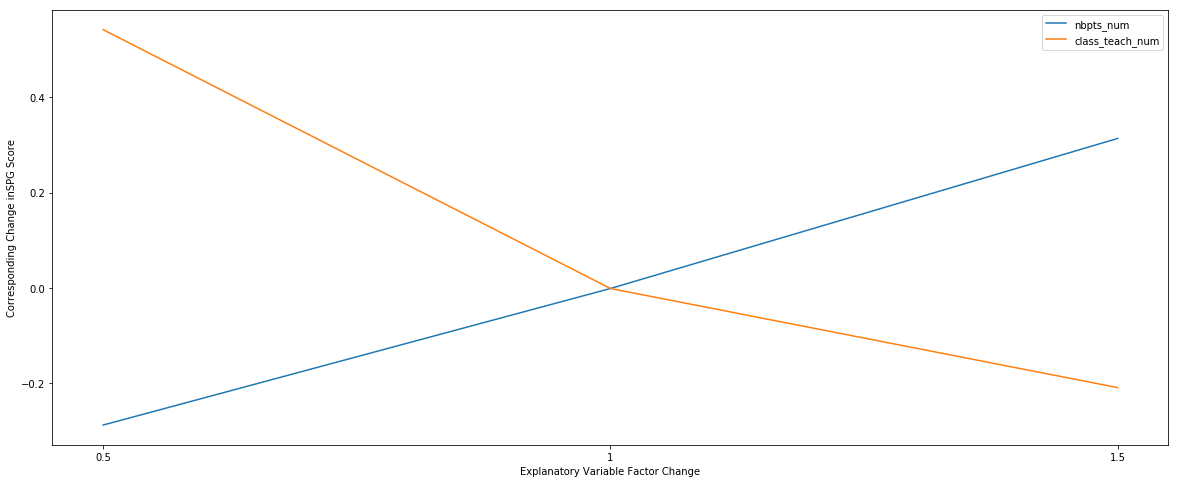

In [8]:
# What degrees of synthetic data do we want to test?
factors = [0.5, 1, 1.5]

# Which variables to be synthesized
change_vars = ['nbpts_num', 'class_teach_num']

# Iteratively running crystal_ball() function
change_df = iterate_synthetic_predictions(factors = factors,
                                         change_vars = change_vars,
                                         train_dfs = df_2017,
                                         verbose = True) # mostly default arguments for now
change_df

# Synthesize 1: 
### Model: All Explanatory Variables (Including Demographics) 
### Change Variables: Select Variables from Feature Importance 
### Dataframe: All Schools in 2017

short_susp_per_c_num * 0.8 : 0.383677332936 
==
short_susp_per_c_num * 0.85 : 0.285005957855 
==
short_susp_per_c_num * 0.9 : 0.18434742401 
==
short_susp_per_c_num * 0.92 : 0.148344658383 
==
short_susp_per_c_num * 0.94 : 0.108943102219 
==
short_susp_per_c_num * 0.96 : 0.0750645515056 
==
short_susp_per_c_num * 0.98 : 0.041244952956 
==
short_susp_per_c_num * 1 : -0.00179858358196 
==
short_susp_per_c_num * 1.02 : -0.035124306652 
==
short_susp_per_c_num * 1.04 : -0.0743806404414 
==
short_susp_per_c_num * 1.06 : -0.10225417982 
==
short_susp_per_c_num * 1.08 : -0.131167479011 
==
short_susp_per_c_num * 1.1 : -0.161787912127 
==
short_susp_per_c_num * 1.15 : -0.241005569735 
==
short_susp_per_c_num * 1.2 : -0.309383625702 
==
short_susp_per_c_num * 1.3 : -0.455253997717 
==
short_susp_per_c_num * 1.5 : -0.728774853717 
==
avg_daily_attend_pct * 0.8 : -2.06523110472 
==
avg_daily_attend_pct * 0.85 : -2.06523110472 
==
avg_daily_attend_pct * 0.9 : -2.06523110472 
==
avg_daily_attend_pc

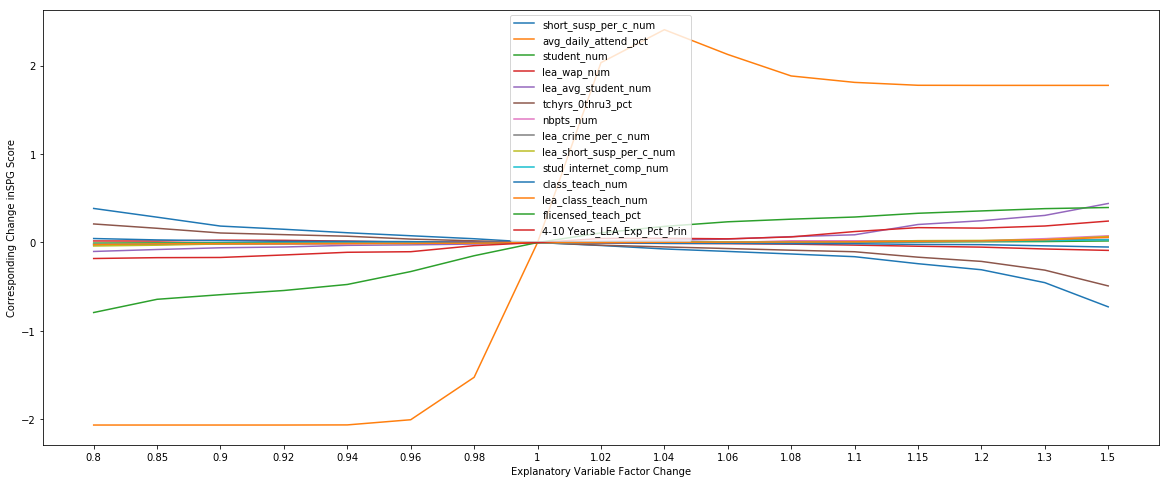

In [9]:
%%time

# Lots of factors, hopefully will help capture nonlinearities
factors = [0.8, 0.85, 0.9, 0.92, 0.94, 0.96, 0.98,
           1, 1.02, 1.04, 1.06, 1.08, 1.1, 1.15, 1.20, 1.3, 1.5]

change_vars = featureImportance
model1_df = iterate_synthetic_predictions(factors = factors,
                                             change_vars = change_vars,
                                             train_dfs = df_2017,
                                             explanatory_variables = all_cols,
                                             verbose = True)

model1_df

In [10]:
# write
path = cwd +'/DatasetCreation/'
model1_df.to_csv(path + 'xgboost_changes1.csv')

In [11]:
outPath = cwd +'/Visuals/'

** Variables with Largest SPG Improvemments on Increase **

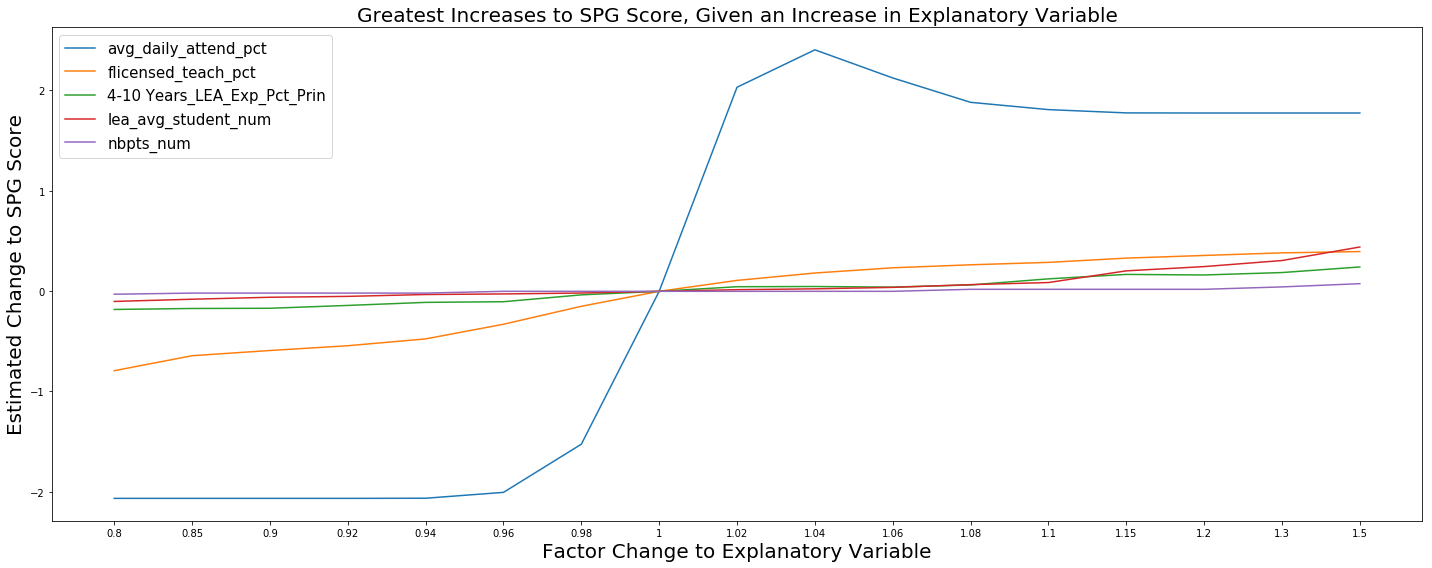

In [12]:
top_changes = model1_df.sort_values('1.1', ascending=False).head(5)

plt.figure(figsize=(20,8))
for var in top_changes.index.values:
    plt.plot(top_changes.T[var])
    plt.legend(fontsize=15)
    plt.title('Greatest Increases to SPG Score, Given an Increase in Explanatory Variable', fontsize=20)
    plt.xlabel('Factor Change to Explanatory Variable', fontsize=20)
    plt.ylabel('Estimated Change to SPG Score', fontsize=20)
    plt.tight_layout()
    plt.savefig(outPath+'/AllIncreaseChanges.png', transparent = True)

** Variables with Largest SPG Improvemments on Decrease **

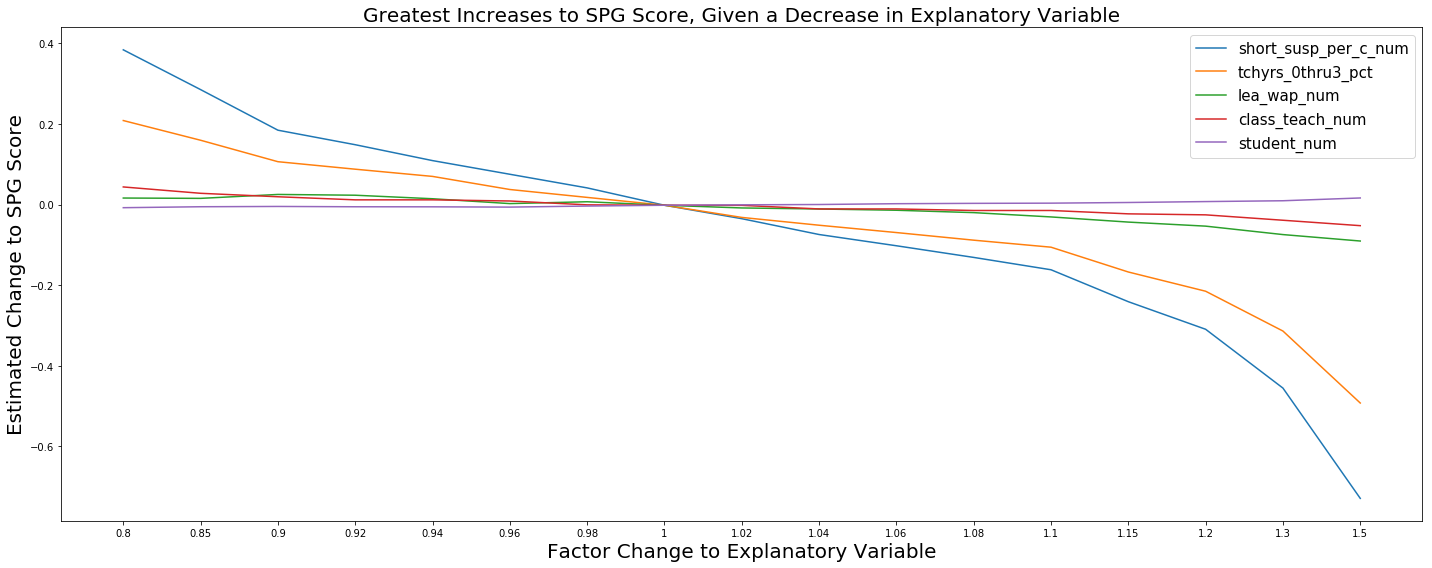

In [13]:
bottom_changes = model1_df.sort_values('0.9', ascending=False).head(5)

plt.figure(figsize=(20,8))
for var in bottom_changes.index.values:
    plt.plot(bottom_changes.T[var])
    plt.legend(fontsize=15)
    plt.title('Greatest Increases to SPG Score, Given a Decrease in Explanatory Variable', fontsize=20)
    plt.xlabel('Factor Change to Explanatory Variable', fontsize=20)
    plt.ylabel('Estimated Change to SPG Score', fontsize=20)
    plt.tight_layout()
    plt.savefig(outPath+'/AllDecreaseChanges.png', transparent = True)

In [14]:
model1_df.head(2)

0.8      0.85       0.9      0.92      0.94  \
short_susp_per_c_num  0.383677  0.285006  0.184347  0.148345  0.108943   
avg_daily_attend_pct -2.065231 -2.065231 -2.065231 -2.065231 -2.063866   

                          0.96      0.98         1      1.02      1.04  \
short_susp_per_c_num  0.075065  0.041245 -0.001799 -0.035124 -0.074381   
avg_daily_attend_pct -2.005395 -1.525564 -0.001799  2.032025  2.405000   

                          1.06      1.08       1.1      1.15       1.2  \
short_susp_per_c_num -0.102254 -0.131167 -0.161788 -0.241006 -0.309384   
avg_daily_attend_pct  2.124789  1.881793  1.809191  1.776386  1.775318   

                           1.3       1.5  
short_susp_per_c_num -0.455254 -0.728775  
avg_daily_attend_pct  1.775318  1.775318

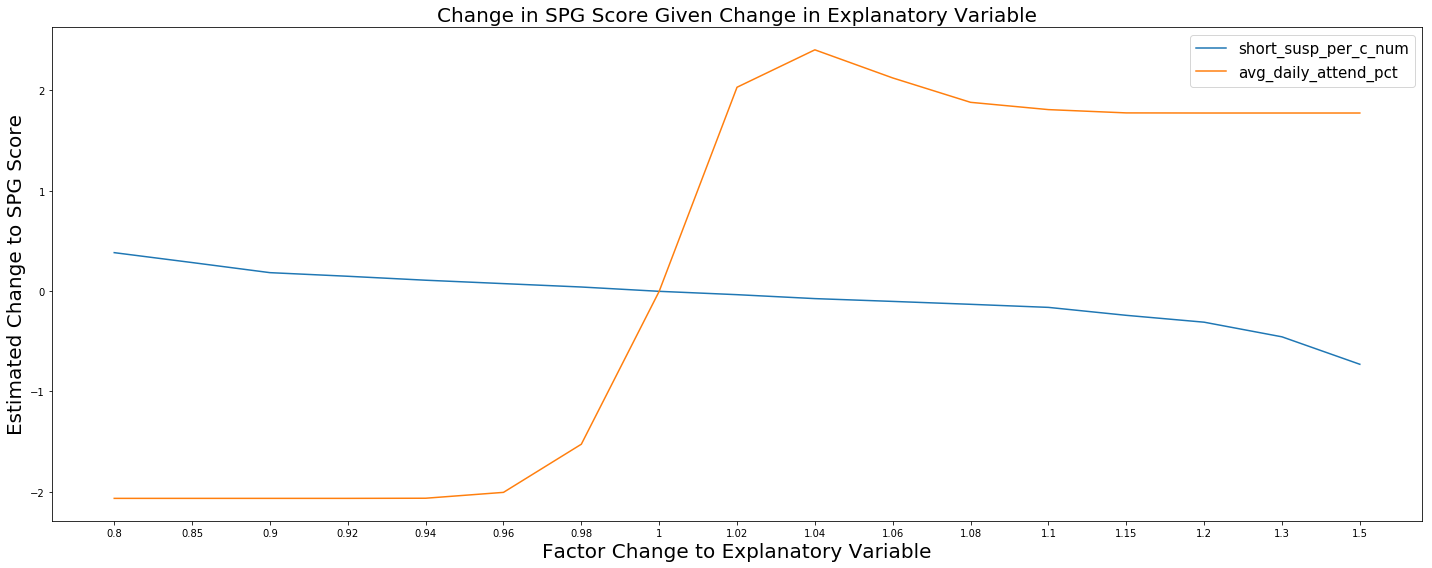

In [18]:
attend = model1_df.head(2)

plt.figure(figsize=(20,8))
for var in attend.index.values:
    plt.plot(attend.T[var])
    plt.legend(fontsize=15)
    plt.title('Change in SPG Score Given Change in Explanatory Variable', fontsize=20)
    plt.xlabel('Factor Change to Explanatory Variable', fontsize=20)
    plt.ylabel('Estimated Change to SPG Score', fontsize=20)
    plt.tight_layout()
    plt.savefig(outPath+'/attend.png', transparent = True)

# Synthesize 2: 
### Model: All Explanatory Variables (Including Demographics) 
### Change Variables: Select Variables from Feature Importance 
### Dataframe: All Low Performing Schools in 2017

CPU times: user 1min 41s, sys: 1.89 s, total: 1min 43s
Wall time: 1min 54s


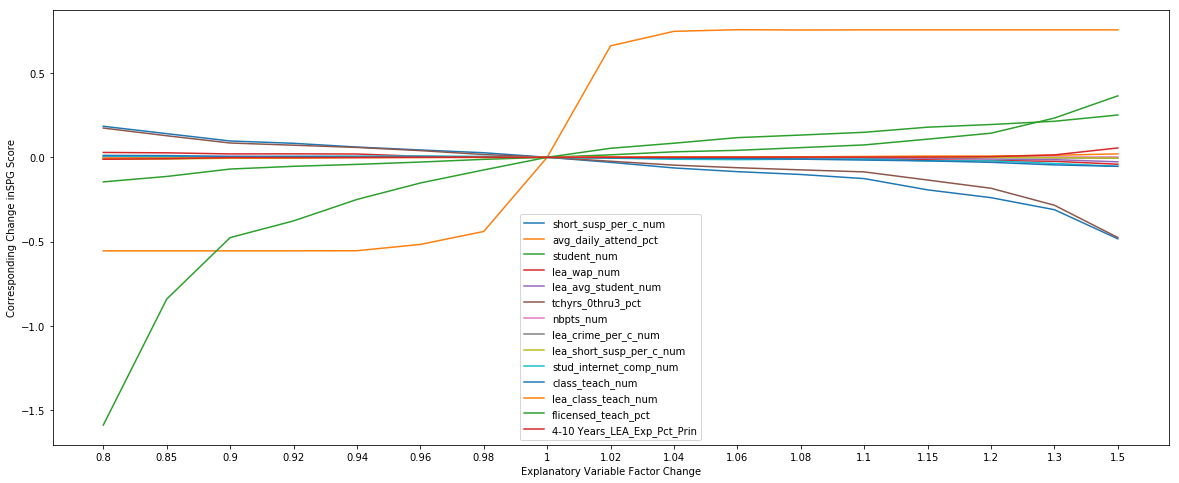

In [23]:
%%time
change_vars = featureImportance
model2_df = iterate_synthetic_predictions(factors = factors,
                                             change_vars = change_vars,
                                             train_dfs = df_2017_Low,
                                             explanatory_variables = all_cols,
                                             verbose = False)

model2_df

In [24]:
model2_df.to_csv(path + 'xgboost_changes2.csv')

** Variables with Largest SPG Improvemments on Increase **

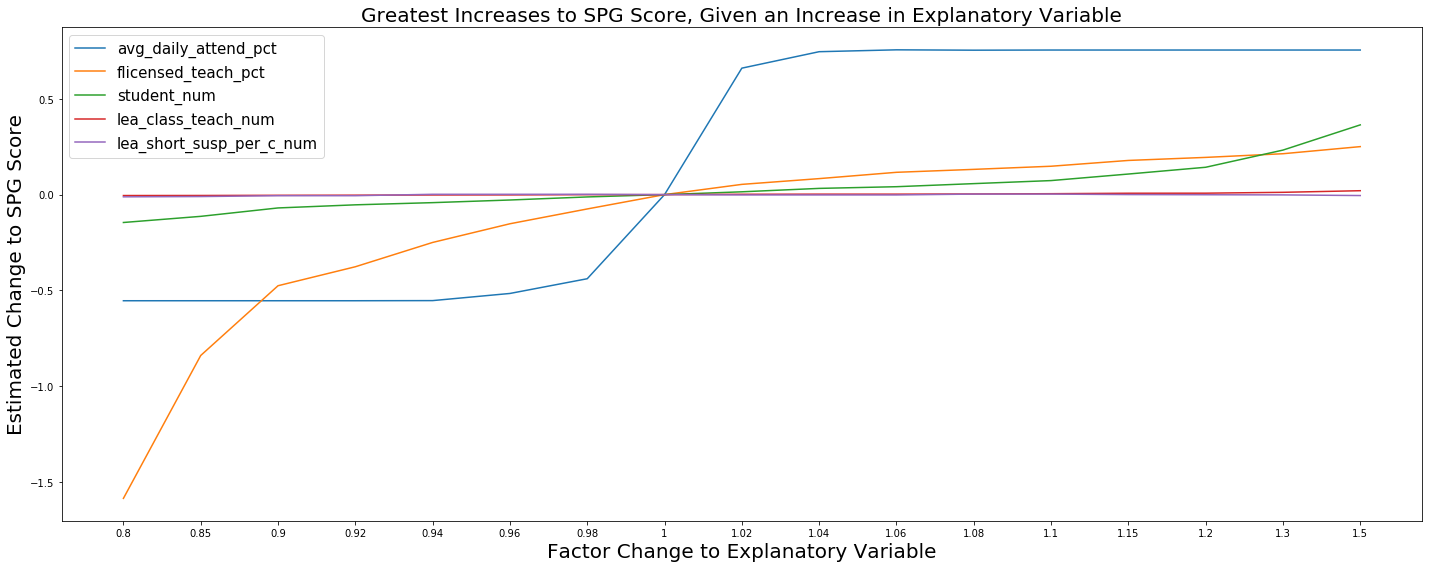

In [27]:
top_changes = model2_df.sort_values('1.1', ascending=False).head(5)

plt.figure(figsize=(20,8))
for var in top_changes.index.values:
    plt.plot(top_changes.T[var])
    plt.legend(fontsize=15)
    plt.title('Greatest Increases to SPG Score, Given an Increase in Explanatory Variable', fontsize=20)
    plt.xlabel('Factor Change to Explanatory Variable', fontsize=20)
    plt.ylabel('Estimated Change to SPG Score', fontsize=20)
    plt.tight_layout()
    plt.savefig(outPath+'/LowIncreaseChanges.png', transparent = True)

** Variables with Largest SPG Improvemments on Decrease **

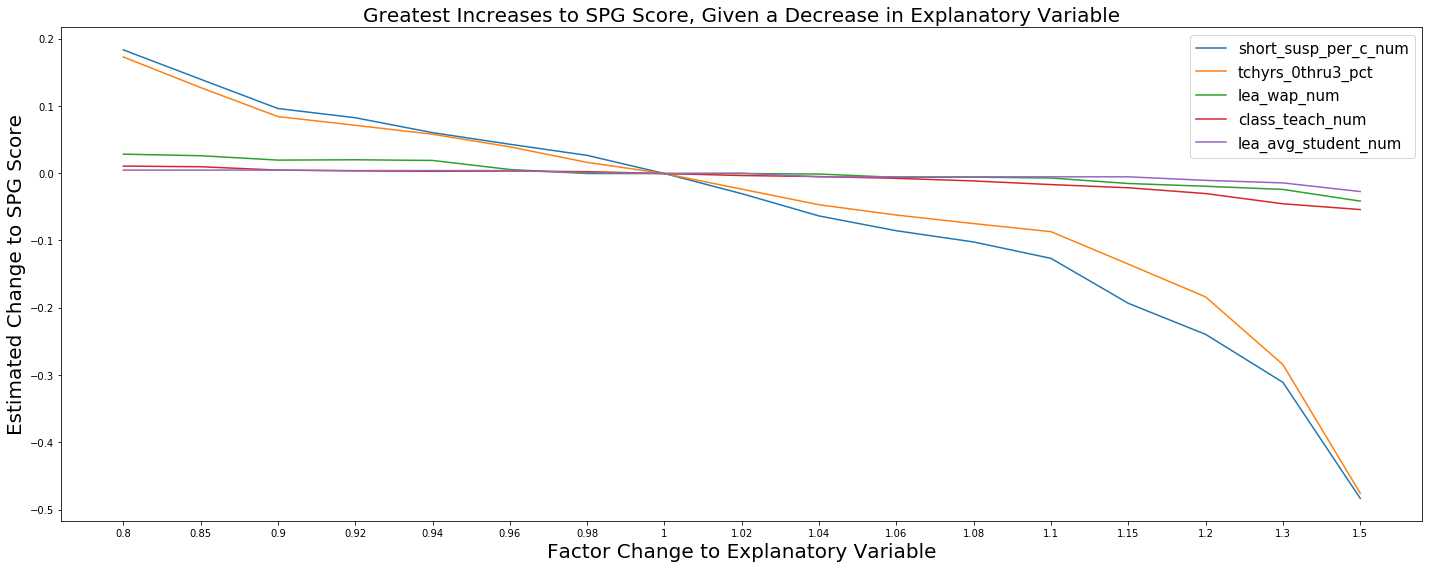

In [26]:
bottom_changes = model2_df.sort_values('0.9', ascending=False).head(5)

plt.figure(figsize=(20,8))
for var in bottom_changes.index.values:
    plt.plot(bottom_changes.T[var])
    plt.legend(fontsize=15)
    plt.title('Greatest Increases to SPG Score, Given a Decrease in Explanatory Variable', fontsize=20)
    plt.xlabel('Factor Change to Explanatory Variable', fontsize=20)
    plt.ylabel('Estimated Change to SPG Score', fontsize=20)
    plt.tight_layout()
    plt.savefig(outPath+'/LowDecreaseChanges.png', transparent = True)

# ======================================

# Iterating Multiple Variables


featureImportance = ['short_susp_per_c_num','avg_daily_attend_pct',
'student_num', 'lea_wap_num', 'lea_avg_student_num',
'tchyrs_0thru3_pct', 'nbpts_num', 'lea_crime_per_c_num',
'lea_short_susp_per_c_num', 'stud_internet_comp_num',
'class_teach_num', 'lea_class_teach_num', 'flicensed_teach_pct',
'4-10 Years_LEA_Exp_Pct_Prin']

In [30]:
from mpl_toolkits.mplot3d import Axes3D

factors1 = [0.5, 1]
factors2 = [0.75, 1, 1.25]
joint_vars = ['avg_daily_attend_pct', 'short_susp_per_c_num']

def iterate_multiple_synthetic_predictions(var_1_factors = factors1, 
                                           var_2_factors = factors2,
                                           change_vars = joint_vars, 
                                           make_plot = True, 
                                           verbose = True, 
                                           train_dfs = df_2017,
                                           target_variable = 'SPG Score',
                                           explanatory_variables = all_cols, 
                                           model = 'xgboost_regressor'):
    
    '''Similar to iterate_synthetic_predictions(), but instead iterates two variables
    at a time for two separate lists of factors. The idea being to observe how the target
    variable changes when two variables at are altered at once, to find an optimal peak.'''
    
    # Empty dataframe to fill with data
    #changes = pd.DataFrame()
    changes = pd.DataFrame(np.zeros((len(var_2_factors), len(var_1_factors))))
    changes.columns = [change_vars[0] + ' * ' + str(factor) for factor in var_1_factors]
    changes.index = [change_vars[1] + ' * ' + str(factor) for factor in var_2_factors]

    all_change_values = []
    for col_num,factor1 in enumerate(var_1_factors):
        for row_num,factor2 in enumerate(var_2_factors):
            
            synthetic_specs = {change_vars[0] : factor1,
                               change_vars[1] : factor2}
            
            # Produce average change in target variable
            avg_change = crystal_ball(train_dfs = train_dfs,
                         synthetic_specs = synthetic_specs, 
                         target_variable = target_variable,
                         explanatory_variables = explanatory_variables, 
                         model = model,
                         return_type = 'avg')
            
            # Create new row based on avg changes 
            #new_row.append(avg_change)
            if verbose:    
                print('Var1: {} * {} || Var2: {} * {} || Avg_Change: {}'.format(change_vars[0], factor1,
                                                                               change_vars[1], factor2,
                                                                               avg_change))
            # Setting avg_change value into correct spot of dataset
            changes.iloc[row_num, col_num] = avg_change
            # all_change_values list makes 3d plot a lot easier
            all_change_values.append(avg_change)
    
    # Makes a 3-dimensional plot of the change to target variable (vertical axis)
    #  given each associated combinations of changes to the joint_vars
    if make_plot:
        # Creates lists of points that can be plotted in 3d (different factor levels have to be repeated)
        #  for the 3d plot to make sense
        total_points= len(all_change_values)
        var1_repeats = total_points / len(var_1_factors)
        var2_repeats = total_points / len(var_2_factors)

        var1_plot_points = []
        for i in range(int(var1_repeats)):
            for j in var_1_factors:
                var1_plot_points.append(j)

        var2_plot_points = []
        for i in range(int(var2_repeats)):
            for j in var_2_factors:
                var2_plot_points.append(j)
        '''
        # Prints multiple plots at iterated viewing angles
        # Got the rotation working with the matplotlib magics, just need to plot one angle now
        for i in range(0,180, 15):
            fig = plt.figure(figsize=(20,10))
            ax = plt.axes(projection='3d')
            ax.plot_trisurf(var1_plot_points, var2_plot_points, all_change_values, cmap='viridis')
            ax.scatter(var1_plot_points, var2_plot_points, all_change_values, color='red')
            ax.set_xlabel(change_vars[0])
            ax.set_ylabel(change_vars[1])
            ax.set_zlabel('Change to ' + str(target_variable))
            ax.view_init(15, i)
        '''
        
        fig = plt.figure(figsize=(20,10))
        ax = plt.axes(projection='3d')
        ax.plot_trisurf(var1_plot_points, var2_plot_points, all_change_values, cmap='viridis')
        ax.scatter(var1_plot_points, var2_plot_points, all_change_values, color='red')
        ax.set_xlabel(change_vars[0])
        ax.set_ylabel(change_vars[1])
        ax.set_zlabel('Change to ' + str(target_variable))
        ax.view_init(15, 65)

    return changes

#iterate_multiple_synthetic_predictions()

** Teacher Vars **

'tchyrs_0thru3_pct',
'tchyrs_4thru10_pct'

Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 0.5 || Avg_Change: 0.4414223705181249
Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 0.75 || Avg_Change: 0.464880375546704
Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 0.9 || Avg_Change: 0.4955727997353929
Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 0.95 || Avg_Change: 0.5050054295362975
Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 0.99 || Avg_Change: 0.5096562612742198
Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 1 || Avg_Change: 0.511630155181555
Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 1.01 || Avg_Change: 0.5133389284535501
Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 1.05 || Avg_Change: 0.5185506518042763
Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 1.1 || Avg_Change: 0.5232112157205663
Var1: tchyrs_0thru3_pct * 0.5 || Var2: tchyrs_4thru10_pct * 1.25 || Avg_Change: 0.5348267223326819
Var1: tchyrs_0thru

<IPython.core.display.Javascript object>


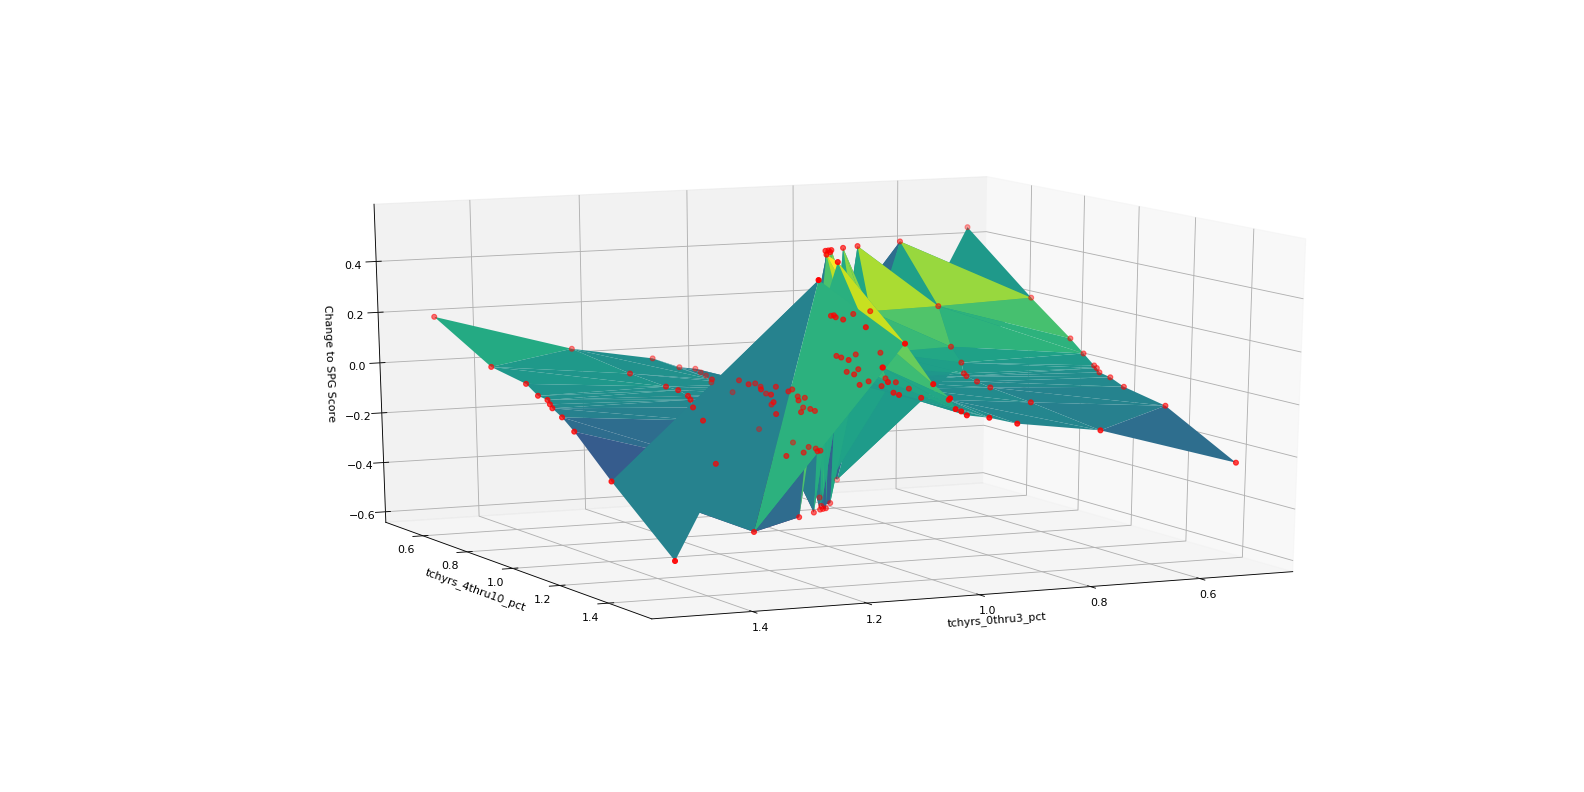

In [31]:
%matplotlib notebook
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


###### NOTE!!! ******
# factors1 and factors2 have to be of different lengths
#  for some reason the matplotlib 3d plot DOES NOT LIKE
#  when they use all the same factors...

# Factors1 modify the first variable in join_vars
# Factors2 modify the second variable
factors1 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.02, 1.05, 1.1, 1.25, 1.5]
factors2 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.05, 1.1, 1.25, 1.5]

    
#factors1 = [0.5, 1, 1.5]
#factors2 = [0.5, 1, 1.5, 2]
joint_vars = ['tchyrs_0thru3_pct', 'tchyrs_4thru10_pct']

joint_change_df = iterate_multiple_synthetic_predictions(var_1_factors = factors1,
                                                        var_2_factors = factors2,
                                                        change_vars = joint_vars,
                                                        explanatory_variables = all_cols,
                                                        target_variable = 'SPG Score',
                                                        model = 'xgboost_regressor',
                                                        verbose = True)


** Daily Attendance Pct vs Suspensions **

<IPython.core.display.Javascript object>


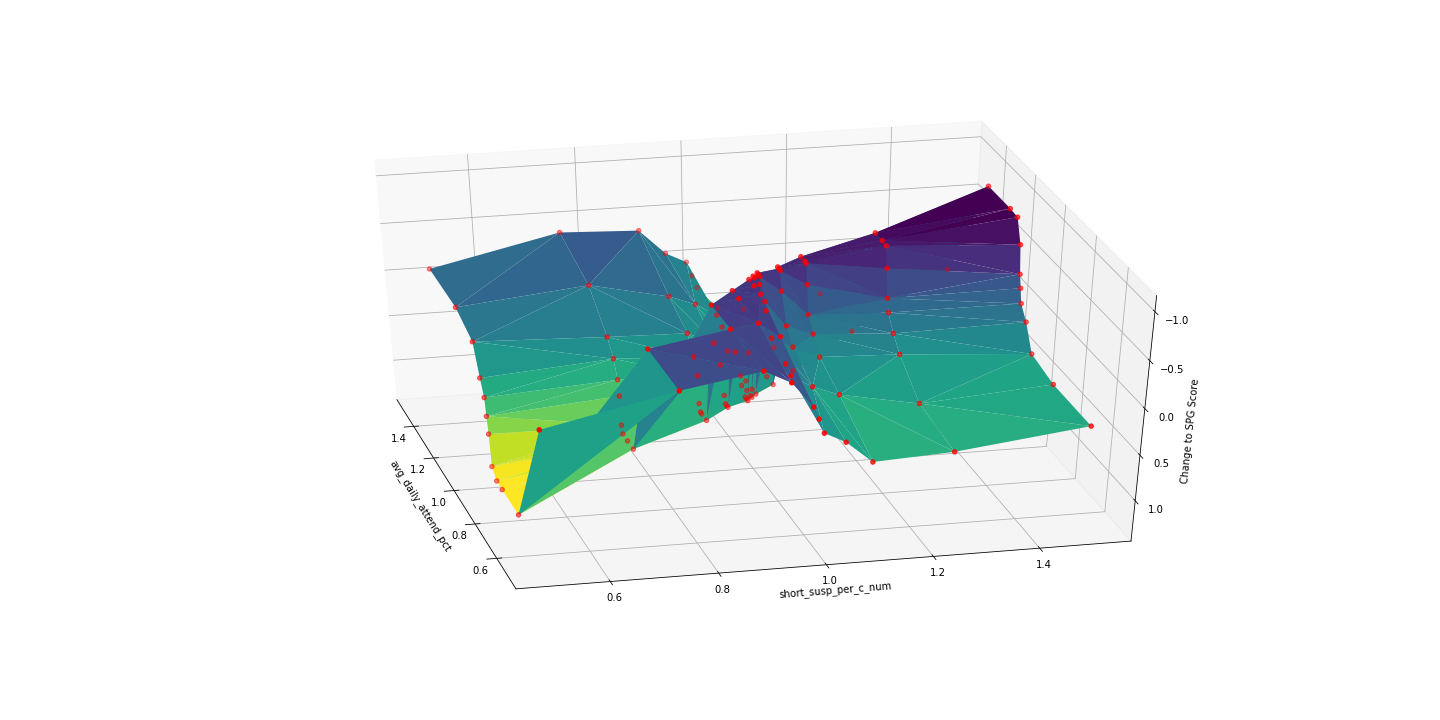

In [192]:
factors1 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.02, 1.05, 1.1, 1.25, 1.5]
factors2 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.05, 1.1, 1.25, 1.5]

    
#factors1 = [0.5, 1, 1.5]
#factors2 = [0.5, 1, 1.5, 2]
joint_vars = ['avg_daily_attend_pct', 'short_susp_per_c_num']

joint_change_df = iterate_multiple_synthetic_predictions(var_1_factors = factors1,
                                                        var_2_factors = factors2,
                                                        change_vars = joint_vars,
                                                        explanatory_variables = all_cols,
                                                        target_variable = 'SPG Score',
                                                        model = 'xgboost_regressor',
                                                        verbose = False)


** Advance Degree Pct vs 10+ Years Princ Exp **

<IPython.core.display.Javascript object>


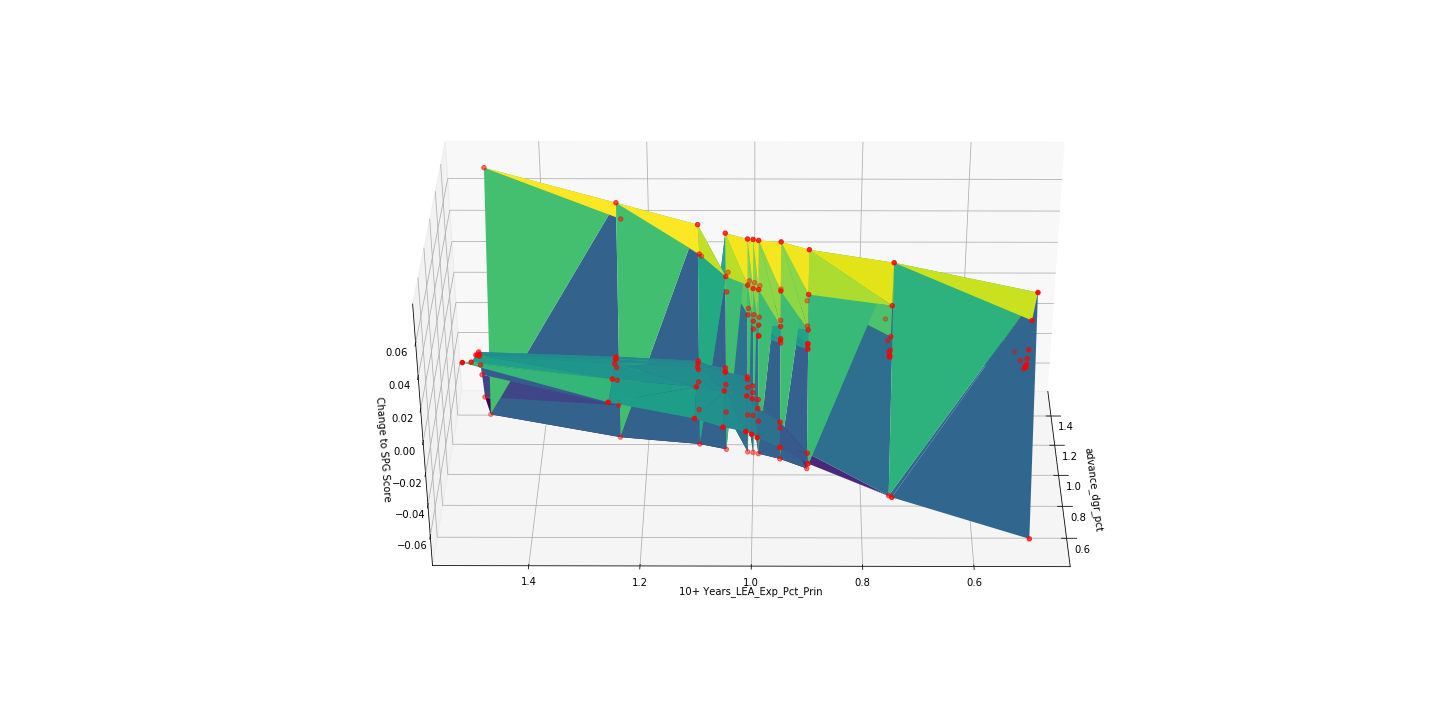

In [193]:
factors1 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.02, 1.05, 1.1, 1.25, 1.5]
factors2 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.05, 1.1, 1.25, 1.5]

    
#factors1 = [0.5, 1, 1.5]
#factors2 = [0.5, 1, 1.5, 2]
joint_vars = ['advance_dgr_pct', '10+ Years_LEA_Exp_Pct_Prin']

joint_change_df = iterate_multiple_synthetic_predictions(var_1_factors = factors1,
                                                        var_2_factors = factors2,
                                                        change_vars = joint_vars,
                                                        explanatory_variables = all_cols,
                                                        target_variable = 'SPG Score',
                                                        model = 'xgboost_regressor',
                                                        verbose = False)


** Teachers vs Internet **

<IPython.core.display.Javascript object>


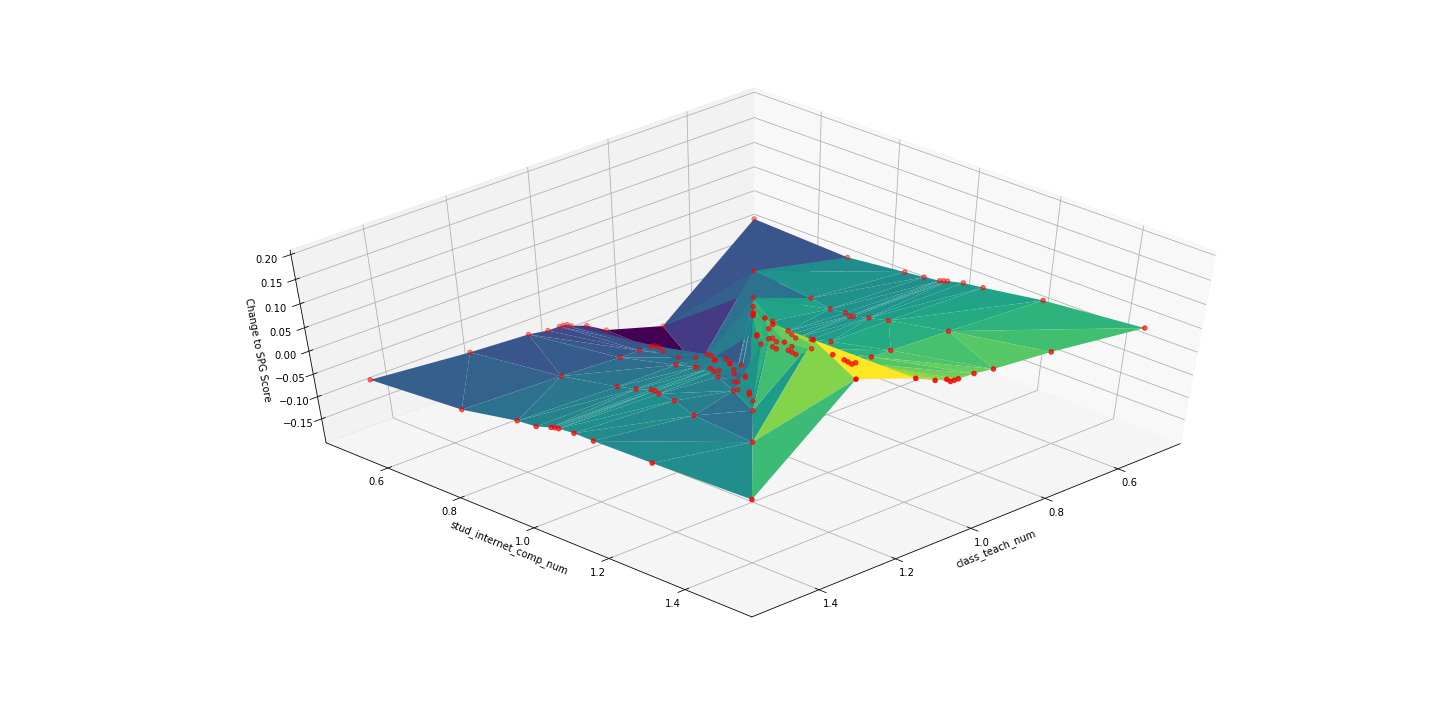

In [194]:
factors1 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.02, 1.05, 1.1, 1.25, 1.5]
factors2 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.05, 1.1, 1.25, 1.5]

    
#factors1 = [0.5, 1, 1.5]
#factors2 = [0.5, 1, 1.5, 2]
joint_vars = ['class_teach_num', 'stud_internet_comp_num']

joint_change_df = iterate_multiple_synthetic_predictions(var_1_factors = factors1,
                                                        var_2_factors = factors2,
                                                        change_vars = joint_vars,
                                                        explanatory_variables = all_cols,
                                                        target_variable = 'SPG Score',
                                                        model = 'xgboost_regressor',
                                                        verbose = False)


** Suspensions vs Crime **
'short_susp_per_c_num', 'crime_per_c_num',

<IPython.core.display.Javascript object>


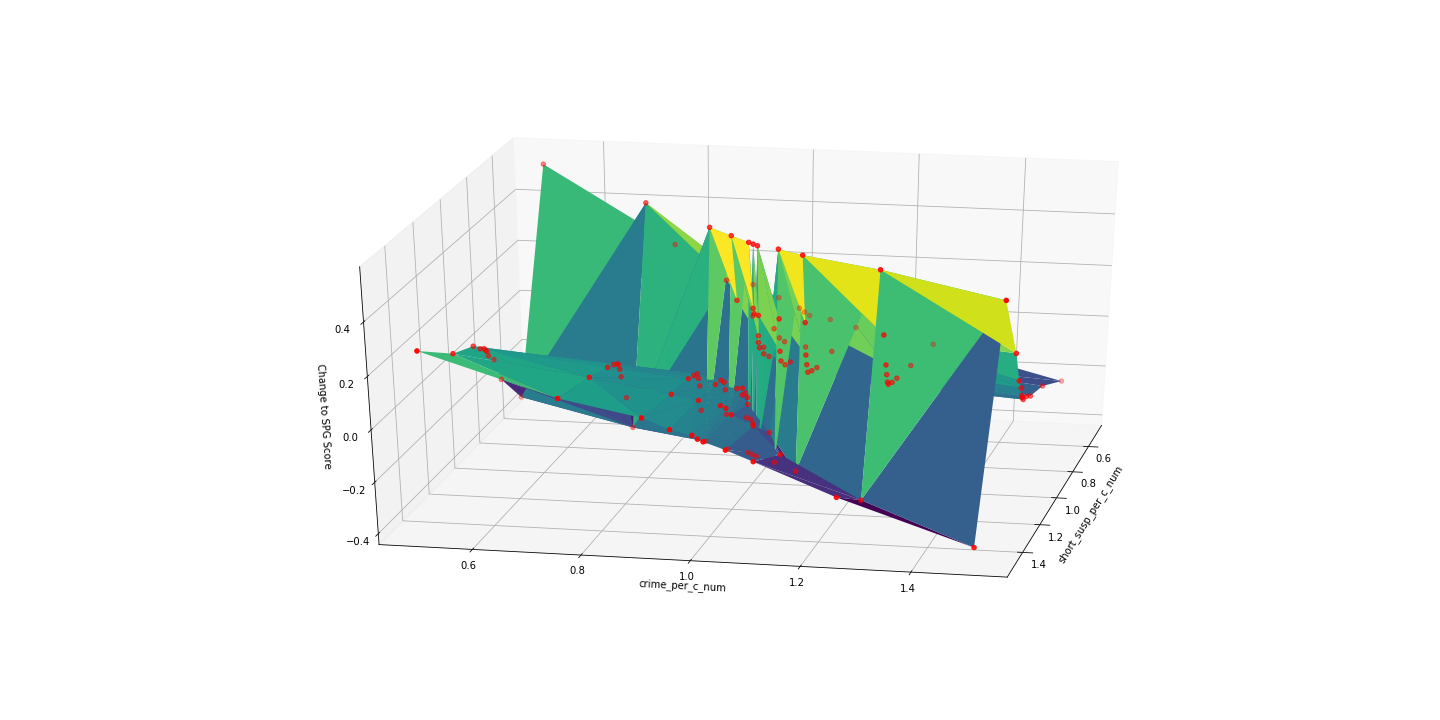

In [195]:
factors1 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.02, 1.05, 1.1, 1.25, 1.5]
factors2 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.05, 1.1, 1.25, 1.5]

    
#factors1 = [0.5, 1, 1.5]
#factors2 = [0.5, 1, 1.5, 2]
joint_vars = ['short_susp_per_c_num', 'crime_per_c_num']

joint_change_df = iterate_multiple_synthetic_predictions(var_1_factors = factors1,
                                                        var_2_factors = factors2,
                                                        change_vars = joint_vars,
                                                        explanatory_variables = all_cols,
                                                        target_variable = 'SPG Score',
                                                        model = 'xgboost_regressor',
                                                        verbose = False)


** Experienced Teachers or Advanced Degrees? **

<IPython.core.display.Javascript object>


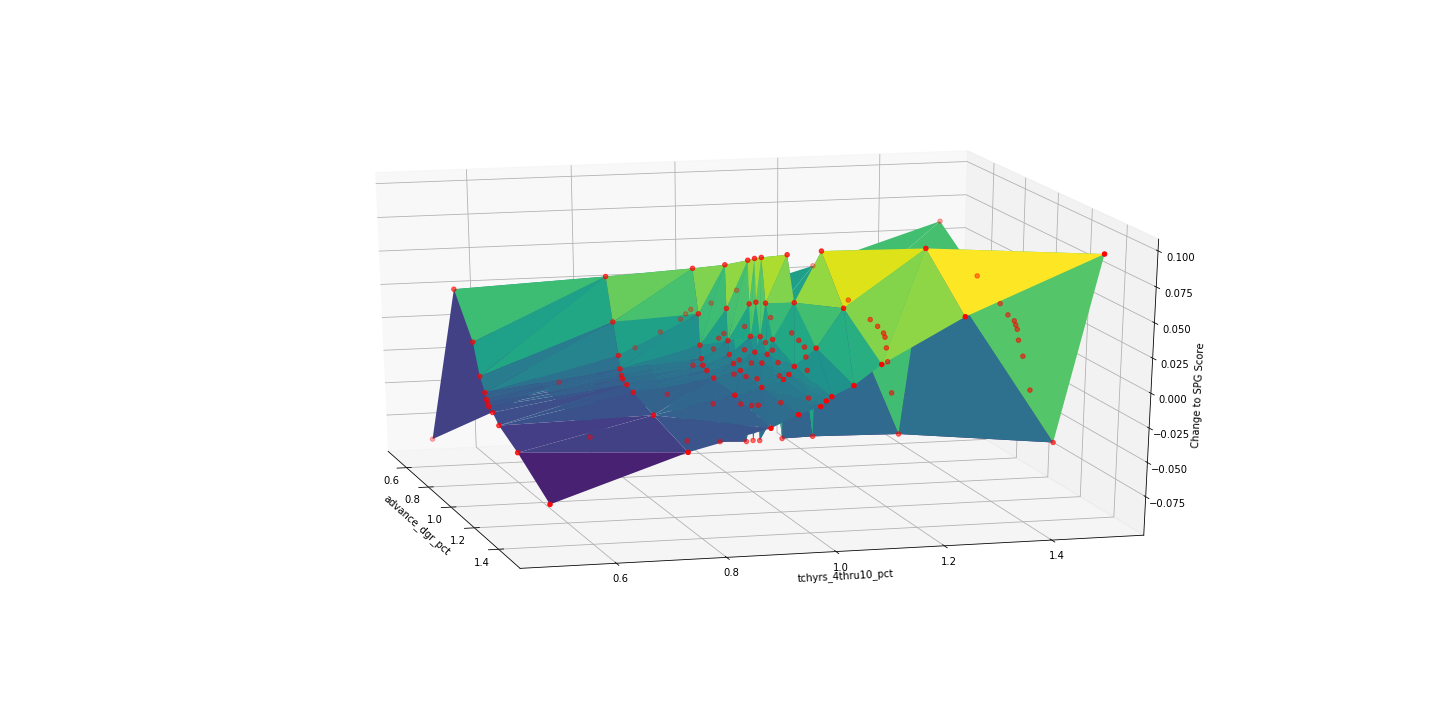

In [196]:
factors1 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.02, 1.05, 1.1, 1.25, 1.5]
factors2 = [0.5, 0.75, 0.9, 0.95, 0.99,
               1, 1.01, 1.05, 1.1, 1.25, 1.5]

    
#factors1 = [0.5, 1, 1.5]
#factors2 = [0.5, 1, 1.5, 2]
joint_vars = ['advance_dgr_pct', 'tchyrs_4thru10_pct']

joint_change_df = iterate_multiple_synthetic_predictions(var_1_factors = factors1,
                                                        var_2_factors = factors2,
                                                        change_vars = joint_vars,
                                                        explanatory_variables = all_cols,
                                                        target_variable = 'SPG Score',
                                                        model = 'xgboost_regressor',
                                                        verbose = False)